# **Data Jobs Salaries in November 2023 in Mexico** (Part 1)
____


Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**26 November 2023**

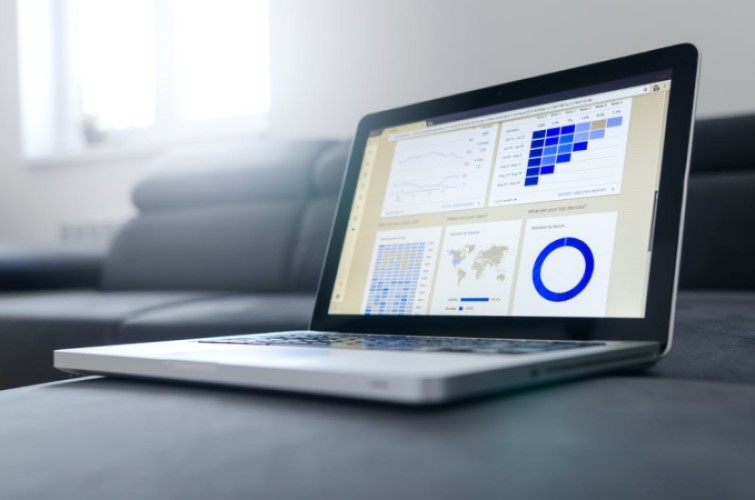

<font size="-1">Image Credit: <a href="https://www.pexels.com/es-es/foto/foto-de-primer-plano-del-portatil-gris-577210/"> Lukas </a> from <a href="https://www.pexels.com/"> Pexels</a>.</font>

___
## **1. Introduction** <a class="anchor" id="intro"></a>
___

### **1.1 Background** <a class="anchor" id="background"></a>
With the emergence of the big data, new jobs have appeared demanding new sets of skills and expertise for extracting value from data (Axis Talent, 2020):

- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)
- Business Intelligence Analysts (BI)
- Machine Learning Engineers (ML)

Which one is the most valued in the Mexican labor market currently?

### **1.2 General Objective** <a class="anchor" id="general_objective"></a>
To identify which data job category has the highest salary in the Mexican labor market in November 2023 according to the OCC website.

### **1.3 Research Question** <a class="anchor" id="question"></a>
Which data job category has the highest salary in the Mexican labor market in November 2023 according to the OCC website?

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>
The **Data Scientist** position has the highest salary in the Mexican labor market in November 2023 according to the OCC website.

### **1.5 Abridged Methodology** <a class="anchor" id="methodology"></a>
The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Descriptive and inferential statistics.
2. **Data requirements**: Data about job positions such as job name, salary, company and location.
3. **Data collection**: Data was collected from the OCC Website (Mexico) on 26 November 2022, through web scraping with Python 3 and its libraries Selenium and BeautifulSoup.
4. **Data exploration**: Data was explored with Python 3 and its libraries Pandas and Seaborn.
5. **Data preparation**: Data then was cleaned and wrangled with Python 3 and its libraries Numpy and Pandas. 
6. **Data analysis and visualization**: Data was analyzed with Python 3 and its libraries Pandas, Scipy and Statsmodels and visualized with Matplotlib, Seaborn, Folium and Plotly. 
7. **Statistical analysis**: The D'Agostino-Pearson normality test was used to assess the normality of the data jobs salary distribution. Then, both parametric (ANOVA and t-test with unequal variance) and non-parametric (Mann-Whitney U and Kruskal-Wallis H) tests were carried out to assess the significance of the obtained results.
8. **Implementation**: A <a href="https://data-jobs-mx-2023.onrender.com/"><b>dashboard</b></a> was built with Python 3 and its libraries Dash and Plotly, and deployed using <a href="https://render.com/">Render</a>.

Furthermore:

9. A <a href="https://github.com/DanielEduardoLopez/DataJobsMX2023/blob/main/Report.pdf"><b>final report</b></a> was written with the complete results obtained from the data.
10. Some <a href="https://github.com/DanielEduardoLopez/DataJobsMX2023/blob/main/Slides.pdf"><b>slides</b></a> were prepared with the **most important insights** from the report.


### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of this notebook is to retrieve job data from the <a href = "https://www.occ.com.mx/">OCC's website </a> through web scraping.

In [ ]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [2]:
# Libraries installation
!pip install numpy
!pip install pandas
!pip install bs4
!pip install selenium
!pip install webdriver_manager

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     ------- ----------------------------- 30.7/143.0 kB 660.6 kB/s eta 0:00:01
     ---------------------------- ------- 112.6/143.0 kB 939.4 kB/s

In [14]:
# Libraries importation
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.firefox.service import Service
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import datetime

___
## **2. Data Collection**
___

According to the above-mentioned data requirements, it is necessary to get the **job name**, **salary**, **company** and **location** for each data job vacancy.

In order to collect the data, two functions were defined: 
- **extract_data**, which scrapes data from a piece of html soup using specific classes identifiers (up to 3), and
- **occscraper**, which scrapes the OCC website and returns the results in a Pandas dataframe. 

The OCC website dynamically sets the class identifiers for its page elements. So, to perform the web scraping, first, it is strongly advised to inspect the <a href="https://www.occ.com.mx/">page</a> using the web browser to get the **current class identifiers**. However, the class ids for the **salary**, **company** and **location** tags changes every few minutes, so, in this project, it has been proposed to use **regular expressions** to scrap as much information as possible.

Once, the class identifiers were set with the help of regular expressions, the **occscraper** function was executed to produce the desired results.

In addition, please note that this code works with **_Mozilla Firefox_** as the web browser.


In [27]:
# Function to try to extract data from html
def extract_data(data, html, tag_1, tag_2, tag_3, class_id_1, class_id_2, class_id_3):
    """
    The purpose of this function is to extract the data from a html soup using specific tags and class identifiers.
    This function will try to scrap the html by using three specific tags and class identifiers. If none is successful, it will append a Numpy NaN value.
    
    Parameters

    data (list): List that will store the data scraped from the html soup.
    html (string): HTML soup processed using Beautiful Soup.
    tag_1 (string): Class tag such as "span", "div" or "p".
    tag_2 (string): Class tag such as "span", "div" or "p".
    tag_3 (string): Class tag such as "span", "div" or "p".
    class_id_1 (re string): Class identifier as a regular expression
    class_id_2 (re string): Class identifier as a regular expression
    class_id_3 (re string): Class identifier as a regular expression

    Returns

    data (list): List with the extracted data.

    """    

    try:
        data.append(html.find(tag_1, attrs = {'class': re.compile(class_id_1)}).text)    
    except:
            try:
                data.append(html.find(tag_2, attrs = {'class': re.compile(class_id_2)}).text)
            except:
                try:
                    data.append(html.find(tag_3, attrs = {'class': re.compile(class_id_3)}).text)
                except:
                    data.append(np.nan)
    return data

In [31]:
# Function to scrape job data from OCC.com.mx
def occscraper(jobs_list, number_pages, vacancy_class, jobname_class, salary_class, company_class, location_class):
    """
    This function scrapes job data from the OCC Website (occ.com.mx): Position Name, Salary, Company and Location.

    IMPORTANT NOTE: OCC Website dynamically sets the class identifiers for its page elements. So, surely the example class 
    identifiers will not produce results when running the present code in a different moment than the one when this code was 
    written and run. Thus, to RE-RUN the code, first, it is strongly advised to first execute the get_classid() function and then 
    INSPECT what are the CURRENT class identifiers to produce NEW results.

    IMPORTANT NOTE 2: This code works with Mozilla Firefox web browser, do not try to run this notebook in Google Colab,
    but run this code in your system instead.

    Parameters

    jobs_list: List with the name of the Data Jobs in both English and Spanish and avoiding empty words (Python list of strings).
    number_pages: Number of pages to scrap from the website (Integer).
    vacancy_class: Class identifier for the vacancy (String)
    jobname_class: Class identifier for the name of the position (String)
    salary_class: Class identifier for the salary of the position (String)
    company_class: Class identifier for the company offering the position (String)
    location_class: Class identifier for the geographical location of the position (String)
    location_class_2: Second class identifier for the geographical location of the position (String)

    Returns 

    df: Pandas Dataframe with the results in a tabular form from the web scraping.    
    """

    # Setting of the base url of the OCC searcher
    base_url = "https://www.occ.com.mx/empleos/de-"
    base_page_url = "?page="

    # Creation of the corresponding url for each job from the jobs list
    jobs_url_list = list(jobs_list)
    length = len(jobs_url_list)

    for i in range(0,length):
        jobs_url_list[i] = jobs_url_list[i].strip()
        jobs_url_list[i] = jobs_url_list[i].lower()
        jobs_url_list[i] = jobs_url_list[i].replace(' ','-')
        jobs_url_list[i] = base_url + jobs_url_list[i]
        jobs_url_list[i] = jobs_url_list[i] + '/'
        #print(jobs_url_list[i])

    # Setting of the executable path in a new service instance 
    service = Service(executable_path=GeckoDriverManager().install())

    # Creation of a new instance of the Firefox driver
    driver = webdriver.Firefox(service = service)
    driver.implicitly_wait(4) # Works perfect

    # Creation of the list to store the data
    data = []

    # Iterations over the different jobs
    for job_url in jobs_url_list:
        
        # Start of the loop
        print('Fetching data for:', jobs_list[jobs_url_list.index(job_url)].title(), 
            ' ({} out of {})'.format(jobs_url_list.index(job_url)+1, length))
        
        # Creation of the different pages for the job
        pages_url_list = []
        for j in range(1, number_pages + 1):
            if j == 1:
                pages_url_list.append(job_url)
            else:
                pages_url_list.append(job_url + base_page_url + str(j))
            
        # Web scrapping over the different pages
        for url in pages_url_list:
            
            # Adding try tag in case urls might have a problem
            try:
                # Soup creation
                driver.get(url)
                # wait = wait(driver, 10) # Didn't work
                # salary = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, salary_class))) # Didn't work

                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                
                # Data extraction
                for vacancies_class in [vacancy_class[0][1], vacancy_class[0][1]]:
                    
                    vacancies = soup.find_all(vacancy_class[0][0], attrs = {'class': vacancies_class})
                    
                    for vacancy in vacancies:
                        job = []                        
                       
                        job.append(extract_data(job, vacancy, jobname_class[0][0], jobname_class[1][0], jobname_class[2][0], 
                                                jobname_class[0][1], jobname_class[1][1], jobname_class[2][1]))
                        job.pop() # Droping last item
                        job.append(extract_data(job, vacancy, salary_class[0][0], salary_class[1][0], salary_class[2][0], 
                                                salary_class[0][1], salary_class[1][1], salary_class[2][1]))
                        job.pop() # Droping last item
                        job.append(extract_data(job, vacancy, company_class[0][0], company_class[1][0], company_class[2][0], 
                                                company_class[0][1], company_class[1][1], company_class[2][1]))                                        
                        job.pop() # Droping last item
                        job.append(extract_data(job, vacancy, location_class[0][0], location_class[1][0], location_class[2][0],
                                                location_class[0][1], location_class[1][1], location_class[2][1]))                     
                        job.pop() # Droping last item

                        data.append(job)
            
            except:
                continue
        
        # End of the urls loop
        print('Successfully retrieved data for:', jobs_list[jobs_url_list.index(job_url)].title(),
            ' ({} out of {})'.format(jobs_url_list.index(job_url) + 1, length) +'\n')

    # End of the main loop
    print('Job done!\n\n')

    # Closure of the Driver
    driver.quit()

    # Store results as a data frame
    df = pd.DataFrame(data, columns = ['Job','Salary','Company','Location'])

    return df

After the two previous functions were defined to perform the web scraping, a list of the most common data jobs was defined based on <a href="https://www.axistalent.io/blog/the-ecosystem-of-data-jobs-making-sense-of-the-data-job-market"> Axistalent (2020)</a>.

In [5]:
# Entry of the Data Jobs in both English and Spanish (avoid empty words) in a Python list

jobs_list = ["analista datos",
           "data analyst",
           "cientifico datos",
           "data scientist",
           "ingeniero datos",
           "data engineer",
           "arquitecto datos",
           "data arquitect",
           "analista negocio",
           "business analyst",
           "bi analyst",
           "business intelligence",
           "aprendizaje automatico",
           "machine learning"]

The number of results pages to scrap was arbitrarily set to 10.

In [6]:
# Number of pages to scrap
number_pages = 10

As mentioned before, the web page was inspected using the web browser and it was possible to identify the current class IDs to effectively perform the web scraping.

For instance, from the below example:

```html
<div id="jobcard-16273963" class="card-0-2-518 flat-0-2-520 card-0-2-553"> # vacancy_class
    <a class="jobcard-0-2-558" aria-label="Vacante ANALISTA DE DATOS" id="3" href="/empleo/oferta/16273963-analista-de-datos/?ai=false&amp;origin=unknown&amp;page=1&amp;rank=3&amp;returnURL=%2Fempleos%2Fde-analista-datos%2F%233&amp;sessionid=&amp;showseo=true&amp;type=0&amp;userid=&amp;uuid=93e2ebc1-1d9b-40dd-b8b8-ccd3d400ed39&amp;widgetCompany=false&amp;geolocation=false"></a>
    <div class="conFluid-0-2-60 gridContainer-0-2-570">
        <div class="row-0-2-173 cardContent-0-2-557">
            <div class="col-0-2-174 xs12-0-2-443 ribbonCol-0-2-576 formatCol-0-2-571">
                <div class="flex-0-2-4 jbetween-0-2-16 astart-0-2-19"><div class="flex-0-2-4 wrap-0-2-11 astart-0-2-19">
                    <label class="text-0-2-82 small-0-2-90 highEmphasis-0-2-103 date-0-2-567">Hace 1 día </label>
                </div>
            </div>
        </div>
        <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571">
            <div class="flex-0-2-4 wrap-0-2-11">
                <h2 class="text-0-2-82 subheading-0-2-86 highEmphasis-0-2-103 job-0-2-556 longWord-0-2-575">ANALISTA DE DATOS</h2> # jobname_class
            </div>
        </div>
        <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571 smallBottomSpace-0-2-573">
            <span class="text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 salary-0-2-559">Sueldo no mostrado por la empresa</span> # salary_class
        </div>
        <div class="fresnel-container fresnel-at-sm "></div>
            <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571">
                <div class="flex-0-2-4 acenter-0-2-21">
                    <div class="" style="flex:1">
                        <div class="flex-0-2-4 jbetween-0-2-16 acenter-0-2-21">
                            <div>
                                <label class="text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 strong-0-2-92 linkContainer-0-2-565">
                                    <a class="locContainer-0-2-564 companyLink-0-2-566 noClickable-0-2-581" title="Buscar empleos en Hitss" href="/empleos/bolsa-de-trabajo-Hitss/"> # company_class
                                    <div class="fresnel-container fresnel-lessThan-sm "></div>
                                    <div class="fresnel-container fresnel-greaterThanOrEqual-sm ">Hitss</div> 
                                    </a>
                                </label>
                                <p class="text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-601"> # location_class
                                    <a title="Empleos en Ciudad de México" class="link-0-2-602 metalink-0-2-603 linkNoMarginRight-0-2-604" href="/empleos/en-ciudad-de-mexico/">CDMX</a> 
                                </p>
                            </div>
                        </div>
                        <div class="fresnel-container fresnel-greaterThan-sm "></div>
                    </div>
                </div>
            </div>
```

The appropriate class ids would be:

* **Vacancy** = ```'card-0-2-518 flat-0-2-520 card-0-2-553'```
* **Job name** = ```'text-0-2-82 subheading-0-2-86 highEmphasis-0-2-103 job-0-2-556 longWord-0-2-575'```
* **Salary** = ```'text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 salary-0-2-559'```
* **Company** = ```'locContainer-0-2-564 companyLink-0-2-566 noClickable-0-2-581'```
* **Location** = ```'text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-601'```

It is important to bear in mind that as of November 2023, the OCC website uses two different classes for marking the location of a vacancy, and two or more different classes for the rest of the elements (job name, salary, company, and location). In this sense, up to three different location classes were defined for each class to get as much information as possible in combination with regular expressions.

In [32]:
# Entry of the OCC Website class identifiers
vacancy_class_1 = ['div', r'card-0-2-520 flat-0-2-522 card-0-2-558'] # div class
vacancy_class_2 = ['div', r'card-0-2-520 flat-0-2-522 card-0-2-558 standout-0-2-559'] # div class
jobname_class_1 = ['h2', r'text-0-2-83 subheading-0-2-87 highEmphasis-0-2-104 job-0-2-561 longWord-0-2-573'] # h2 class
jobname_class_2 = ['h2', r'text-0-2-83 subheading-0-2-87 midEmphasis-0-2-105 job-0-2-561 longWord-0-2-573'] # h2 class
jobname_class_3 = ['h2', r'text-0-2-83 subheading-0-2-87 highEmphasis-0-2-104 job-0-2-561 longWord-0-2-573'] # h2 class
salary_class_1 = ['span', r'text-0-2-83 standard-0-2-90 highEmphasis-0-2-104 salary.*'] # id1
salary_class_2 = ['span', r'text-0-2-83 standard-0-2-90 midEmphasis-0-2-104 salary.*'] # id2
salary_class_3 = ['span', r'text-0-2-83 standard-0-2-90 highEmphasis-0-2-104 salary-0-2-564'] # Salary no available
company_class_1 = ['label', r'text-0-2-83 standard-0-2-90 highEmphasis-0-2-104 strong-0-2-93 linkContainer.*'] # id1
company_class_2 = ['label', r'text-0-2-83 standard-0-2-90 midEmphasis-0-2-104 strong-0-2-93 linkContainer.*'] # id2
company_class_3 = ['span', r'locContainer-0-2-604'] # Confidential company
location_class_1 = ['p', r'text-0-2-83 small-0-2-91 highEmphasis-0-2-104 zonesLinks.*'] # id1
location_class_2 = ['p', r'text-0-2-83 small-0-2-91 midEmphasis-0-2-104 zonesLinks.*'] # id2
location_class_3 = ['a', r'link-0-2-586 metalink-0-2-587 linkNoMarginRight-0-2-588'] # Location no available

# Creation of lists of lists
vacancy_class = [vacancy_class_1, vacancy_class_2]
jobname_class = [jobname_class_1, jobname_class_2, jobname_class_3]
salary_class = [salary_class_1, salary_class_2, salary_class_3]
company_class = [company_class_1, company_class_2, company_class_3]
location_class = [location_class_1, location_class_2, location_class_3]

In [33]:
# Proof of concept

url = "https://www.occ.com.mx/empleos/de-data-analyst/?page=1"

# Setting of the executable path in a new service instance 
service = Service(executable_path=GeckoDriverManager().install())

# Creation of a new instance of the Firefox driver
driver = webdriver.Firefox(service = service)
driver.implicitly_wait(5) # Works perfect

# Creation of the list to store the data
data = []

driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Data extraction 
vacancies = soup.find_all('div', attrs = {'class': vacancy_class_1})

for vacancy in vacancies:
    job = []                        
    
    job.append(extract_data(job, vacancy, jobname_class[0][0], jobname_class[1][0], jobname_class[2][0], 
                            jobname_class[0][1], jobname_class[1][1], jobname_class[2][1]))
    job.pop() # Droping last item
    job.append(extract_data(job, vacancy, salary_class[0][0], salary_class[1][0], salary_class[2][0], 
                            salary_class[0][1], salary_class[1][1], salary_class[2][1]))
    job.pop() # Droping last item
    job.append(extract_data(job, vacancy, company_class[0][0], company_class[1][0], company_class[2][0], 
                            company_class[0][1], company_class[1][1], company_class[2][1]))                                        
    job.pop() # Droping last item
    job.append(extract_data(job, vacancy, location_class[0][0], location_class[1][0], location_class[2][0],
                            location_class[0][1], location_class[1][1], location_class[2][1]))                     
    job.pop() # Droping last item

    data.append(job)
# Closure of the Driver
driver.quit()

# Store results as a data frame
df_test = pd.DataFrame(data, columns = ['Job','Salary','Company','Location'])

df_test

,Job,Salary,Company,Location
0,Data Analyst,Sueldo no mostrado por la empresa,Michael Page,
1,Data Analyst,"$60,000 - $65,000 Mensual",Alia,"San José Insurgentes, Benito Juárez, CDMX"
2,Data analyst,"$30,000 - $35,000 Mensual",Empresa confidencial,"Miguel Hidalgo, CDMX"
3,Data analyst,Sueldo no mostrado por la empresa,"Carl Zeiss de México, ...",CDMX
4,Portfolio Data Analyst,Sueldo no mostrado por la empresa,Banamex,CDMX
5,Data Procurement Analyst,Sueldo no mostrado por la empresa,Grupo Peñafiel,CDMX
6,Data Tech Analyst - Content Management,Sueldo no mostrado por la empresa,Banamex,CDMX
7,Streamming and Big Data Senior Analyst,Sueldo no mostrado por la empresa,Banamex,CDMX
8,Data Architecture Lead Analyst,Sueldo no mostrado por la empresa,Banamex,CDMX
9,Data Warehouse Senior Analyst,Sueldo no mostrado por la empresa,Banamex,CDMX


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       15 non-null     object
 1   Salary    15 non-null     object
 2   Company   15 non-null     object
 3   Location  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


The test was successful, so the website was scraped with the above code.

In [35]:
# Current time for documentation purposes
ct = datetime.datetime.now()
print("current time:", ct)

current time: 2023-11-26 17:17:22.047262


In [36]:
# Call of the web scraping function
df = occscraper(jobs_list, number_pages, vacancy_class, jobname_class, salary_class, company_class, location_class)

Fetching data for: Analista Datos  (1 out of 14)
Successfully retrieved data for: Analista Datos  (1 out of 14)

Fetching data for: Data Analyst  (2 out of 14)
Successfully retrieved data for: Data Analyst  (2 out of 14)

Fetching data for: Cientifico Datos  (3 out of 14)
Successfully retrieved data for: Cientifico Datos  (3 out of 14)

Fetching data for: Data Scientist  (4 out of 14)
Successfully retrieved data for: Data Scientist  (4 out of 14)

Fetching data for: Ingeniero Datos  (5 out of 14)
Successfully retrieved data for: Ingeniero Datos  (5 out of 14)

Fetching data for: Data Engineer  (6 out of 14)
Successfully retrieved data for: Data Engineer  (6 out of 14)

Fetching data for: Arquitecto Datos  (7 out of 14)
Successfully retrieved data for: Arquitecto Datos  (7 out of 14)

Fetching data for: Data Arquitect  (8 out of 14)
Successfully retrieved data for: Data Arquitect  (8 out of 14)

Fetching data for: Analista Negocio  (9 out of 14)
Successfully retrieved data for: Analista

In [37]:
df.head(10)

,Job,Salary,Company,Location
0,Analista de datos,"$20,000 - $25,000 Mensual",SKANDIA OPERADORA DE F...,"Polanco II Sección, Miguel Hidalgo, CDMX"
1,Analista de Datos,Sueldo no mostrado por la empresa,GENERAL DE SEGUROS,CDMX
2,Analista de datos MDM,"$17,000 - $20,000 Mensual",Grupo Alnus S.A. de C.V.,"Monterrey, N.L."
3,ANALISTA DE DATOS ECOMMERCE,"$16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"
4,Analista de datos maestros,"$10,000 Mensual",Empresa confidencial,"Monterrey, N.L."
5,Coordinador analista de datos,Sueldo no mostrado por la empresa,Empresa confidencial,"Miguel Hidalgo, CDMX"
6,ANALISTA DE DATOS / EXPERTO EN EXCEL,"$11,000 - $13,000 Mensual",Empresa confidencial,"Zapopan, Jal."
7,Analista de Datos en Azure (6 meses),"$55,000 - $60,000 Mensual",SYGNO,"Monterrey, N.L."
8,Analista de Datos (Power Bi-Tableau),"$29,000 Mensual",Empresa confidencial,CDMX
9,Analista de base de datos,"$25,000 - $27,000 Mensual",SERVICIOS DE ENERGIA E...,"Monterrey, N.L."


In [38]:
df.tail(10)

,Job,Salary,Company,Location
3812,Trabajo Desde Casa Desarrollador .NET Backend ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3813,Work From Home Junior QA Automation / R+D/ Ref...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3814,Work From Home .NET + Angular Architect / R + ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3815,Work From Home SemiSenior Angular Developer / ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3816,Work From Home QA Automation Developer / R + D...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3817,Work From Home Python Tech Lead / Research + D...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3818,Trabajo Desde Casa Desarrollador Junior/MidLev...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3819,Work From Home Angular Architect / R+D / Ref. ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3820,Work From Home Angular Tech Lead / R+D / Ref. ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."
3821,Work From Home Senior Angular Developer / R+D ...,Sueldo no mostrado por la empresa,BAIRESDEV LLC / (Tax I...,"Guadalajara, Jal."


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       3822 non-null   object
 1   Salary    3822 non-null   object
 2   Company   3822 non-null   object
 3   Location  3822 non-null   object
dtypes: object(4)
memory usage: 119.6+ KB


Almost no empty values were retrieved for the desired data attributes. So, the web scraping process was successful. 

Then, the data collected was exported to a CSV file.

In [40]:
# Data exporting to a CSV file
df.to_csv('Dataset_raw.csv', index=False, encoding='utf-8')

**Python Requirements File:**

In [1]:
!pip freeze > requirements.txt

In [ ]:
# End